In [1]:
import numpy as np
from pathlib import Path
from astropy.io import fits
from astropy.table import Table, vstack, hstack, unique,join
import matplotlib.pyplot as plt
import pandas as pd
import sys
from PyAstronomy import pyasl
# sys.path.append("/global/u2/b/bid13/VI/prospect/py")
from os import walk

import desispec.coaddition
import desispec.io
import desispec.spectra
# from desitarget.cmx.cmx_targetmask import cmx_mask
from desitarget.sv1.sv1_targetmask import desi_mask
from prospect import utilities,plotframes, myspecselect, myspecupdate
from desispec.coaddition import coadd_cameras
from prospect import utilities ,plotframes
# from prospect_my import plotframes
from astropy.io import fits
from importlib import reload
import stack_spectra
reload(stack_spectra)
from stack_spectra import _common_grid,_wavg,_normalize, _coadd_cameras

In [6]:
my_path = Path("/global/cscratch1/sd/lmezini/spectra/z08_09")


In [7]:
__,__,filename = next(walk(my_path))
print(sorted(filename))


['zbest-0-80605-thru20210205_spectra.fits', 'zbest-0-80605-thru20210205_zcat.fits', 'zbest-0-80607-thru20201219_spectra.fits', 'zbest-0-80607-thru20201219_zcat.fits', 'zbest-0-80609-thru20201217_spectra.fits', 'zbest-0-80609-thru20201217_zcat.fits', 'zbest-0-80620-thru20201221_spectra.fits', 'zbest-0-80620-thru20201221_zcat.fits', 'zbest-0-80622-thru20201221_spectra.fits', 'zbest-0-80622-thru20201221_zcat.fits', 'zbest-0-80670-thru20210111_spectra.fits', 'zbest-0-80670-thru20210111_zcat.fits', 'zbest-0-80674-thru20210116_spectra.fits', 'zbest-0-80674-thru20210116_zcat.fits', 'zbest-0-80676-thru20210109_spectra.fits', 'zbest-0-80676-thru20210109_zcat.fits', 'zbest-0-80678-thru20210206_spectra.fits', 'zbest-0-80678-thru20210206_zcat.fits', 'zbest-0-80680-thru20210208_spectra.fits', 'zbest-0-80680-thru20210208_zcat.fits', 'zbest-0-80682-thru20210109_spectra.fits', 'zbest-0-80682-thru20210109_zcat.fits', 'zbest-0-80684-thru20210305_spectra.fits', 'zbest-0-80684-thru20210305_zcat.fits', 'zb

In [8]:
flux_arr = []
wl_arr = []
ivar_arr = []
z_arr = []
for f in sorted(filename):
    start = f[0:15]
    if start in f and 'spectra' in f:
        spec = desispec.io.read_spectra(my_path /  f)
        flux = spec.flux
        wave = spec.wave
        ivar = spec.ivar
        flux, wave, ivar = _coadd_cameras(flux,wave,ivar)
        zfile = f[:-12]+'zcat.fits'
        z = Table.read(my_path / zfile)
        flux_arr.append(flux)
        for i in range(len(flux)):
            wl_arr.append(wave)
        for j in z['Z']:
            z_arr.append(j)
        ivar_arr.append(ivar)
        

INFO:spectra.py:253:read_spectra: iotime 0.101 sec to read zbest-0-80605-thru20210205_spectra.fits at 2021-04-25T19:49:52.531553
INFO:spectra.py:253:read_spectra: iotime 0.121 sec to read zbest-0-80607-thru20201219_spectra.fits at 2021-04-25T19:49:56.796699
INFO:spectra.py:253:read_spectra: iotime 0.417 sec to read zbest-0-80609-thru20201217_spectra.fits at 2021-04-25T19:50:01.276119
INFO:spectra.py:253:read_spectra: iotime 0.279 sec to read zbest-0-80620-thru20201221_spectra.fits at 2021-04-25T19:50:05.983169
INFO:spectra.py:253:read_spectra: iotime 0.149 sec to read zbest-0-80622-thru20201221_spectra.fits at 2021-04-25T19:50:10.353095
INFO:spectra.py:253:read_spectra: iotime 0.689 sec to read zbest-0-80670-thru20210111_spectra.fits at 2021-04-25T19:50:15.184633
INFO:spectra.py:253:read_spectra: iotime 0.163 sec to read zbest-0-80674-thru20210116_spectra.fits at 2021-04-25T19:50:19.806928
INFO:spectra.py:253:read_spectra: iotime 0.546 sec to read zbest-0-80676-thru20210109_spectra.fit

In [9]:
flux_arr = np.vstack(flux_arr)
wl_arr = np.vstack(wl_arr)
ivar_arr = np.vstack(ivar_arr)
z_arr = np.array(z_arr)
#f_avg, ivar_avg = _wavg(flux_arr,ivar=None,weighted=False, weights = None)
print(len(z_arr))


29166


In [10]:
print(len(z_arr))


29166


In [11]:
new_f,new_i,new_wl = _common_grid(flux_arr, wl_arr, ivar_arr, z_arr, z_out=0.0, wave_grid=None)
new_f,new_i = _normalize(new_f,new_i)
f_avg, ivar_avg = _wavg(new_f,ivar=new_i,weighted=False, weights = None)
vals_to_save = {'flux':new_f,'wl':new_wl,'ivar':new_i,'z':z_arr,'f_avg':f_avg,'i_avg':ivar_avg}
np.savez('z08_09.npz', **vals_to_save)

KeyboardInterrupt: 

In [517]:
D2 = pyasl.airtovac2(5889.95)
print(D2)
D1 = pyasl.airtovac2(5895.92)
print(D1)

balmer_g = pyasl.airtovac2(4340.464)
print("Balmer g {}".format(balmer_g))

balmer_e = pyasl.airtovac2(3970.072)
print("Balmer E {}".format(balmer_e))

balmer_d = pyasl.airtovac2(4101.734)
print("balmer d {}".format(balmer_d))

C1 = pyasl.airtovac2(4307.74)
print("C I {}".format(C1))

C2H = pyasl.airtovac2(3968.5)
print("c II H {}".format(C2))

C2K = pyasl.airtovac2(3933.7)
print("C II K {}".format(C2K))
#emission lines
O2_1 = pyasl.airtovac2(3725.95)
print(O2_1)

O2_2 = pyasl.airtovac2(3728.815)
print(O2_2)

balmerb = pyasl.airtovac2(4861.325)
print(balmerb)

balmera = pyasl.airtovac2(6562.801)
print(balmera)

5891.582397002884
5897.553996121541
Balmer g 4341.684323950806
Balmer E 3971.1952071107207
balmer d 4102.891635400124
C I 4308.951712740587
c II H 3969.6227967437712
C II K 3934.8137167095047
3727.0097012599767
3729.875443761954
4862.68302104103
6564.613973711027


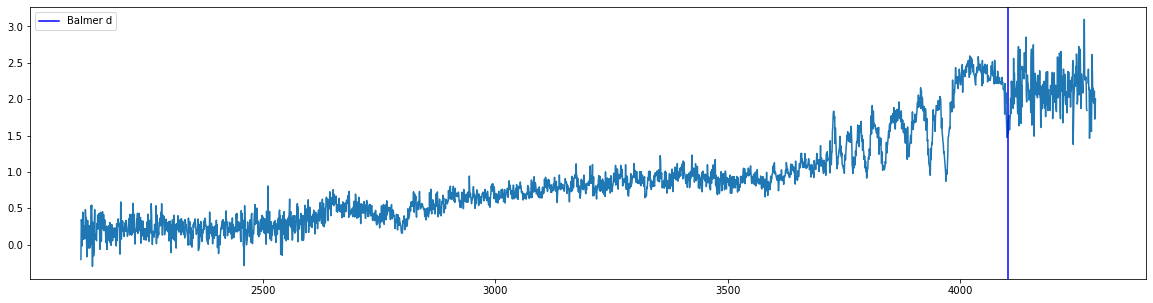

In [523]:
plt.figure(figsize=(20,5))
plt.plot(new_wl,f_avg)
#plt.axvline(balmera,c = 'r',label='balmer a')
#plt.axvline(balmerb,c = 'yellow',label='balmer b')
#plt.axvline(D1,c = 'c',label='D1')
#plt.axvline(D2,c = 'm',label='D2')
#plt.axvline(C2K,c='r',label='C II K')
#plt.axvline(O2_1,c = 'orange',label='O2')
#plt.axvline(O2_2,c = 'b',label='O2',linestyle='--')
#plt.axvline(C1,label='C I',c='r')
plt.axvline(balmer_d,label='Balmer d',c='b')
#plt.xlim(balmera-20,balmera+20)
plt.legend()
plt.show()

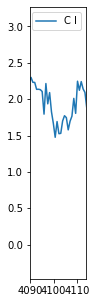

In [519]:
plt.figure(figsize=(1,5))
plt.plot(new_wl,f_avg)
#plt.axvline(balmera,c = 'r',label='balmer a')
#plt.axvline(balmerb,c = 'yellow',label='balmer b')
plt.axvline(C1,label='C I')
#@plt.axvline(D1,c = 'c',label='D1')
#plt.axvline(D2,c = 'm',label='D2')
#plt.axvline(O2,c = 'orange',label='O2')
plt.xlim(balmer_d-13,balmer_d+11)
plt.legend()
plt.show()

In [520]:
mask = np.where(np.logical_and(new_wl>balmer_d-13, new_wl<=balmer_d+11))
res = np.polyfit(new_wl[mask],f_avg[mask],deg=2)
p = np.poly1d(res)
print(p)

          2
0.004651 x - 38.16 x + 7.828e+04


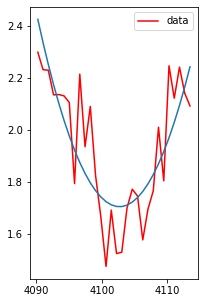

In [521]:
plt.figure(figsize=(3,5))
plt.plot(new_wl[mask],f_avg[mask],c = 'r',label = "data")
plt.plot(new_wl[mask],p(new_wl[mask]))
plt.legend()
plt.show()

In [522]:
fit_line_wl = new_wl[mask][np.where(p(new_wl[mask]) == np.min(p(new_wl[mask])))[0]][0]
print(round(fit_line_wl,3),round(balmer_d,3))

4103.041 4102.892


In [326]:
data_path = Path("/global/cfs/cdirs/desi/spectro/templates/elg_templates/v2.1")
fname = "elg_templates_v2.1.fits"

10


(3700.0, 3740.0)

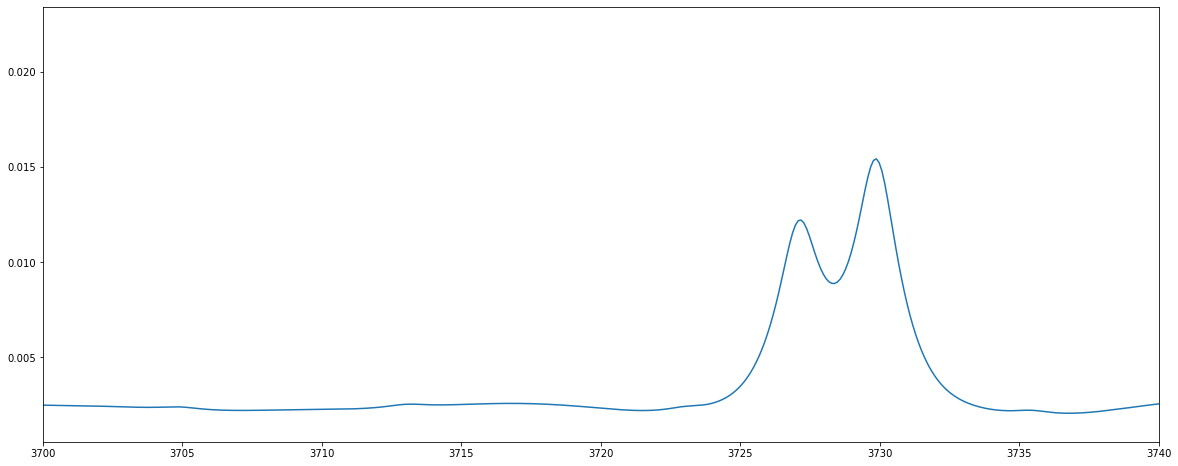

In [327]:

hdu = fits.open("/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/code/redrock-templates/master/rrtemplate-galaxy.fits")
flux = hdu[0].data
dw = 0.1
print(len(flux))
wave = np.arange(3500/(1+1.85), 11000+dw/2, dw)
plt.figure(figsize=(20,8))
plt.plot(wave, flux[0,:]) # there are 10 templates. Any spectra can be a linear combination of these 10, here selecting the 0th one
plt.xlim(3700, 3740)

In [328]:
mask = np.where(np.logical_and(wave>=3726.5, wave<=3728))
res = np.polyfit(wave[mask],flux[0,:][mask],deg=3)
p = np.poly1d(res)
p

poly1d([ 3.57642849e-03, -3.99961534e+01,  1.49095878e+05, -1.85264318e+08])

(3700.0, 3740.0)

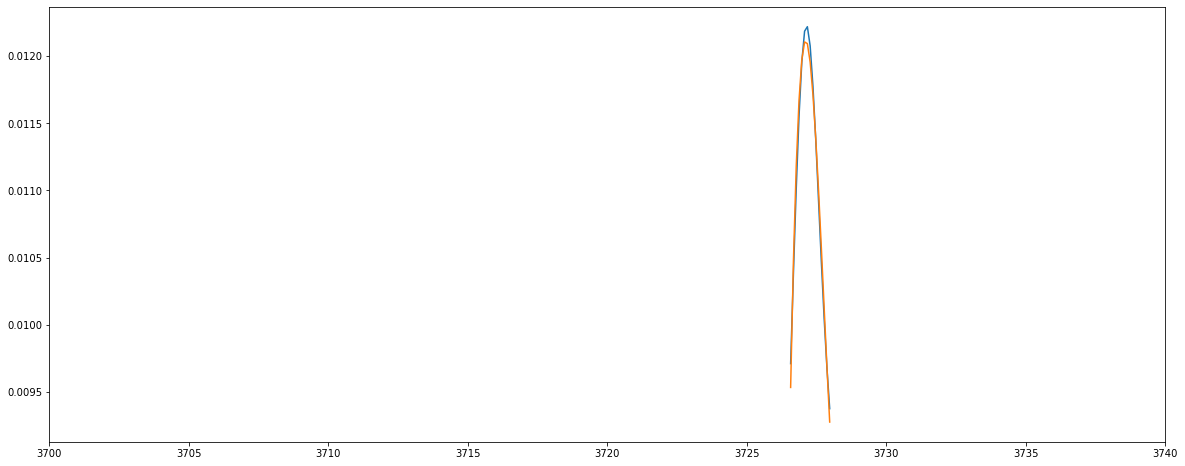

In [329]:
plt.figure(figsize=(20,8))
plt.plot(wave[mask], flux[0,:][mask]) # there are 10 templates. Any spectra can be a linear combination of these 10, here selecting the 0th one
plt.plot(wave[mask], p(wave[mask]))
plt.xlim(3700, 3740)

In [333]:
fit_peak = wave[mask][np.where(p(wave[mask]) == np.max(p(wave[mask])))]
true_peak = wave[mask][np.where(wave[mask] == np.max(wave[mask]))]

In [334]:
print(fit_peak,true_peak)

[3727.07017544] [3727.97017544]


In [5]:
f = np.load('z10_11.npz')
flux = f['flux']
ivar = f['ivar']
wl = f['wl']
z = f['z']
new_f,new_i,new_wl = _common_grid(flux, wl, ivar, z, z_out=0.0, wave_grid=None)
new_f,new_i = _normalize(new_f,new_i)
f_avg, ivar_avg = _wavg(new_f,ivar=new_i,weighted=False, weights = None)
vals_to_save = {'flux':new_f,'wl':new_wl,'ivar':new_i,'z':z,'f_avg':f_avg,'i_avg':ivar_avg}
np.savez('z10_11.npz',**vals_to_save)